# BDA Analyseprojekt 
Ilma Lupic 217098; Celina Wegner 216841; Malaika Hatos 216839

Datengrundlage: Steam-Datensatz: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset 

Fragestellung:
Welche Faktoren beeinflussen den Erfolg eines Videospiels auf der Vertriebsplattform Steam?  
Welche Rolle spielen dabei Preis, Genre oder Bewertungen?	
 
Hypothese: 
Spiele, die im 4. Quartal veröffentlicht wurden, sind im Durchschnitt erfolgreicher als Spiele, die in den Quartalen 1 bis 3 veröffentlicht wurden. 	
 
Zielsetzung:  
Ziel ist es, zentrale Einflussfaktoren für den Erfolg von Videospielen auf der Vertriebsplattform Steam zu identifizieren und zu untersuchen. Unter „Erfolg“ verstehen wir dabei ein Zusammenspiel aus Verkaufszahlen, aktiver Spieleranzahl, Bewertungen sowie der durchschnittlichen Spielzeit. Unsere Analyse soll Aufschluss darüber bieten, ob bestimmte Merkmale wie Genre, Preisgestaltung oder Nutzerbewertungen in Korrelation mit dem Erfolg eines Spiels stehen und wie genau.  Außerdem wird geprüft, ob das Veröffentlichungsquartal eines Spiels einen Einfluss auf dessen Erfolg hat. 

Das übergeordnete Ziel ist es, fundierte Aussagen darüber treffen zu können, welche Eigenschaften ein Spiel heute aufweisen sollte, um auf Steam möglichst erfolgreich zu sein.  


---------------------------------------------------------------------------

In [ ]:
# Bibliotheken
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import requests
from time import sleep

---------------------------------------------------------------------------

1. Daten einlesen

In [146]:
df = pd.read_csv("data/games.csv", index_col=False)
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
Discount                        int64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements

---------------------------------------------------------------------------

2. Datenvorbereitung

In [147]:
#df.head()

In [148]:
df.isnull().sum()

AppID                              0
Name                               6
Release date                       0
Estimated owners                   0
Peak CCU                           0
Required age                       0
Price                              0
Discount                           0
DLC count                          0
About the game                  6483
Supported languages                0
Full audio languages               0
Reviews                       100828
Header image                       0
Website                        64994
Support url                    60693
Support email                  19025
Windows                            0
Mac                                0
Linux                              0
Metacritic score                   0
Metacritic url                107447
User score                         0
Positive                           0
Negative                           0
Score rank                    111408
Achievements                       0
R

Löschung von Spalten

In [149]:
df = df.drop(columns=["Header image"])
df = df.drop(columns=["Screenshots"])
df = df.drop(columns=["Support email"])
df = df.drop(columns=["Movies"])
df = df.drop(columns=["Support url"])
df = df.drop(columns=["User score"])
df = df.drop(columns=["Windows"])
df = df.drop(columns=["Achievements"])
df = df.drop(columns=["Supported languages"])
df = df.drop(columns=["Categories"])
df = df.drop(columns=["Mac"])
df = df.drop(columns=["Linux"])
df = df.drop(columns=["Metacritic url"])
df = df.drop(columns=["Notes"]) ## = Average playtime forever?
df = df.drop(columns=["Developers"])


In [150]:
df.isnull().sum()

AppID                              0
Name                               6
Release date                       0
Estimated owners                   0
Peak CCU                           0
Required age                       0
Price                              0
Discount                           0
DLC count                          0
About the game                  6483
Full audio languages               0
Reviews                       100828
Website                        64994
Metacritic score                   0
Positive                           0
Negative                           0
Score rank                    111408
Recommendations                    0
Average playtime forever           0
Average playtime two weeks         0
Median playtime forever            0
Median playtime two weeks          0
Publishers                      6778
Genres                          6440
Tags                           37423
dtype: int64

In [151]:


#pd.set_option('display.max_colwidth', None)  # Ganze Spalteninhalte anzeigen lassen


#print(df)

Untersuchung von fehlenden Werten

In [152]:
print(len(df))

111452


In [153]:
df[df.isnull().any(axis=1)]

# Nur NaN in 'Score rank' und 'Reviews' erlauben (da sonst keine Zeilen mehr übrig sind), sonst alle NaN-Zeilen löschen
df_clean = df.dropna(subset=[col for col in df.columns if col not in ['Score rank', 'Reviews']])

In [154]:
print(len(df))

111452


Die gleiche Anzahl an Zeilen bleibt übrig aber an sich sind in den wichtigen Spalten keine fehlenden Werte, nur in den Spalten mit Text zum größten Teil.

In [155]:
df.isnull().sum()

AppID                              0
Name                               6
Release date                       0
Estimated owners                   0
Peak CCU                           0
Required age                       0
Price                              0
Discount                           0
DLC count                          0
About the game                  6483
Full audio languages               0
Reviews                       100828
Website                        64994
Metacritic score                   0
Positive                           0
Negative                           0
Score rank                    111408
Recommendations                    0
Average playtime forever           0
Average playtime two weeks         0
Median playtime forever            0
Median playtime two weeks          0
Publishers                      6778
Genres                          6440
Tags                           37423
dtype: int64

In [156]:
# zeigt die häufigkeit der spiele basierend auf ihrem namen: Beispiel für Textspalten
print(df['Name'].value_counts())

Name
Shadow of the Tomb Raider: Definitive Edition    20
Alone                                             6
Tom Clancy's Rainbow Six® Siege                   5
Train Simulator Classic                           5
Echoes                                            5
                                                 ..
Horse Runner DX                                   1
Stellaluna                                        1
Coin x Union                                      1
Delusional Playtest                               1
Galactic Bowling                                  1
Name: count, Length: 110325, dtype: int64


Duplicate untersuchen

In [157]:
#Prüfung ob Duplicate vorhanden sind
df.duplicated().sum()

np.int64(0)

In [158]:
# Überprüfung auf Duplikate basierend auf der Spalte 'Name'
df[df['Name'].duplicated()]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Negative,Score rank,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Publishers,Genres,Tags
2874,890030,Shadow of the Tomb Raider: Definitive Edition,"Sep 14, 2018",0 - 20000,0,17,0.00,0,0,In Shadow of the Tomb Raider Definitive Editio...,...,4747,NaN,48664,0,0,0,0,"Square Enix,Feral Interactive (Mac),Feral inte...","Action,Adventure","Adventure,Lara Croft,Action,Female Protagonist..."
3029,849178,Shadow of the Tomb Raider: Definitive Edition,"Sep 14, 2018",0 - 20000,0,17,0.00,0,0,In Shadow of the Tomb Raider Definitive Editio...,...,4825,NaN,48664,0,0,0,0,"Square Enix,Feral Interactive (Mac),Feral inte...","Action,Adventure","Adventure,Lara Croft,Action,Female Protagonist..."
3752,740730,Station Commander,"Dec 18, 2017",0 - 20000,0,0,4.99,0,0,"Station Commander is an indie, procedurally ge...",...,2,NaN,0,0,0,0,0,Technically Competent,"Indie,Simulation,Strategy","Strategy,Indie,Simulation"
4197,37970,Jewel Quest Pack,"Aug 24, 2009",0 - 20000,0,0,19.99,0,0,Includes the first three titles in the the ult...,...,3,NaN,0,0,0,0,0,iWin,Casual,"Casual,Puzzle,Match 3"
4287,488824,Tom Clancy's Rainbow Six® Siege,"Dec 1, 2015",0 - 20000,0,17,19.99,0,11,Master the art of destruction and gadgetry in ...,...,64201,NaN,899455,0,0,0,0,Ubisoft,Action,"FPS,Multiplayer,Tactical,Shooter,Team-Based,Ac..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,3234330,Ninja Ming,"Apr 10, 2025",0 - 20000,0,0,8.99,10,0,Ninja Ming is a precision platformer with a te...,...,3,NaN,0,0,0,0,0,"1 Poss Studio,Erabit","Action,Adventure,Indie","Precision Platformer,2D Platformer,Pixel Graph..."
110960,3610150,Hentai Beach,"Apr 16, 2025",0 - 0,0,0,1.59,0,0,Hentai Beach - solve puzzles of different comp...,...,0,NaN,0,0,0,0,0,UwU,"Casual,Indie",NaN
110961,3626890,Upstream,"Apr 17, 2025",0 - 0,0,0,1.99,0,0,A game for those who crave the struggle. You a...,...,0,NaN,0,0,0,0,0,Icarus,"Casual,Indie",NaN
111074,3290500,Hyperborea,"Apr 3, 2025",0 - 0,0,0,0.00,0,0,Hyperborea is a modern take on the classic Fir...,...,0,NaN,0,0,0,0,0,Sequin Games,"Action,Free To Play",NaN


In [159]:
# Anzahl der Duplikate basierend auf der Spalte 'Name'
duplicate_count = df['Name'].duplicated().sum()
print(f"Anzahl der Duplikate: {duplicate_count}")

Anzahl der Duplikate: 1126


In [160]:
# Liste der Spielnamen, die gefiltert werden sollen
spielnamen = [
    "Shadow of the Tomb Raider: Definitive Edition",
    "Alone",
    "Tom Clancy's Rainbow Six® Siege",
    "Train Simulator Classic ",
    "Echoes "
]

# Filtern des DataFrames basierend auf den Spielnamen
filtered_games = df[df['Name'].isin(spielnamen)]

# Sortieren der gefilterten Spiele nach dem Namen
filtered_games_sorted = filtered_games.sort_values(by='Name')

# Ausgabe der gefilterten und sortierten Spiele mit allen Spalten
print(filtered_games_sorted)

         AppID                                           Name  Release date  \
28969  1789460                                          Alone  Nov 11, 2021   
57702   871870                                          Alone  Jun 21, 2018   
45682   837930                                          Alone   May 1, 2018   
29806  1975890                                          Alone  Jul 22, 2022   
20338  1640090                                          Alone  Jul 29, 2021   
79831  2639140                                          Alone  Oct 31, 2023   
6264    849166  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   
58130   905320  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   
2874    890030  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   
57100   849160  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   
53817   849179  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   
51390   849167  Shadow of the Tomb Raider: Definitiv

Bei weiterer Untersuchung der Steam-Bibliothek hat sich ergeben dass das Spiel "Shadow of the Tomb Raider: Definitive Edition" tatsächlich nur unter der AppID 750920 gelistet ist.
Wir überprüfen ob Einträge mit dieser AppID im Datensatz vorhanden ist.

In [161]:
ziel_appid = 750920

# DataFrame nach diesen AppIDs filtern
gefiltertes_spiel = df[df['AppID'] == ziel_appid]

print(gefiltertes_spiel)

        AppID                                           Name  Release date  \
15117  750920  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   

        Estimated owners  Peak CCU  Required age  Price  Discount  DLC count  \
15117  1000000 - 2000000       904            17    0.0         0          0   

                                          About the game  ... Negative  \
15117  In Shadow of the Tomb Raider Definitive Editio...  ...    10026   

      Score rank Recommendations  Average playtime forever  \
15117        NaN           48672                      1914   

       Average playtime two weeks  Median playtime forever  \
15117                          27                      754   

       Median playtime two weeks  \
15117                         49   

                                              Publishers            Genres  \
15117  Square Enix,Feral Interactive (Mac),Feral inte...  Action,Adventure   

                                                    T

In [162]:
df = df[~((df['Name'] == "Shadow of the Tomb Raider: Definitive Edition") & (df['AppID'] != 750920))]

print(df[df['Name'] == "Shadow of the Tomb Raider: Definitive Edition"])

        AppID                                           Name  Release date  \
15117  750920  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   

        Estimated owners  Peak CCU  Required age  Price  Discount  DLC count  \
15117  1000000 - 2000000       904            17    0.0         0          0   

                                          About the game  ... Negative  \
15117  In Shadow of the Tomb Raider Definitive Editio...  ...    10026   

      Score rank Recommendations  Average playtime forever  \
15117        NaN           48672                      1914   

       Average playtime two weeks  Median playtime forever  \
15117                          27                      754   

       Median playtime two weeks  \
15117                         49   

                                              Publishers            Genres  \
15117  Square Enix,Feral Interactive (Mac),Feral inte...  Action,Adventure   

                                                    T

In [163]:
spielnamen = [
    "Shadow of the Tomb Raider: Definitive Edition",
    "Alone",
    "Tom Clancy's Rainbow Six® Siege",
    "Train Simulator Classic ",
    "Echoes "
]

# Filtern des DataFrames basierend auf den Spielnamen
filtered_games = df[df['Name'].isin(spielnamen)]

# Sortieren der gefilterten Spiele nach dem Namen
filtered_games_sorted = filtered_games.sort_values(by='Name')

# Ausgabe der gefilterten und sortierten Spiele mit allen Spalten
print(filtered_games_sorted)

         AppID                                           Name  Release date  \
20338  1640090                                          Alone  Jul 29, 2021   
28969  1789460                                          Alone  Nov 11, 2021   
29806  1975890                                          Alone  Jul 22, 2022   
45682   837930                                          Alone   May 1, 2018   
57702   871870                                          Alone  Jun 21, 2018   
79831  2639140                                          Alone  Oct 31, 2023   
15117   750920  Shadow of the Tomb Raider: Definitive Edition  Sep 14, 2018   
2904    488821                Tom Clancy's Rainbow Six® Siege   Dec 1, 2015   
4287    488824                Tom Clancy's Rainbow Six® Siege   Dec 1, 2015   
8256    359550                Tom Clancy's Rainbow Six® Siege   Dec 1, 2015   
21190   488823                Tom Clancy's Rainbow Six® Siege   Dec 1, 2015   
38967   488822                Tom Clancy's Rainbow S

Bei weiterer Untersuchung der Steam-Bibliothek hat sich ergeben dass das Spiel "Tom Clancy's Rainbow Six® Siege" tatsächlich nur unter der AppID 359550 gelistet ist.
Wir überprüfen ob Einträge mit dieser AppID im Datensatz vorhanden ist.

In [164]:
ziel_appid = 359550

# DataFrame nach diesen AppIDs filtern
gefiltertes_spiel = df[df['AppID'] == ziel_appid]

print(gefiltertes_spiel)

       AppID                             Name Release date  \
8256  359550  Tom Clancy's Rainbow Six® Siege  Dec 1, 2015   

         Estimated owners  Peak CCU  Required age  Price  Discount  DLC count  \
8256  20000000 - 50000000     42263            17  19.99         0         11   

                                         About the game  ... Negative  \
8256  Master the art of destruction and gadgetry in ...  ...   138530   

     Score rank Recommendations  Average playtime forever  \
8256        NaN          899477                     13837   

      Average playtime two weeks  Median playtime forever  \
8256                         707                     3100   

      Median playtime two weeks  Publishers  Genres  \
8256                        319     Ubisoft  Action   

                                                   Tags  
8256  FPS,Hero Shooter,Multiplayer,Tactical,Shooter,...  

[1 rows x 25 columns]


In [165]:
df = df[~((df['Name'] == "Tom Clancy's Rainbow Six® Siege") & (df['AppID'] != 359550))]

print(df[df['Name'] == "Tom Clancy's Rainbow Six® Siege"])

       AppID                             Name Release date  \
8256  359550  Tom Clancy's Rainbow Six® Siege  Dec 1, 2015   

         Estimated owners  Peak CCU  Required age  Price  Discount  DLC count  \
8256  20000000 - 50000000     42263            17  19.99         0         11   

                                         About the game  ... Negative  \
8256  Master the art of destruction and gadgetry in ...  ...   138530   

     Score rank Recommendations  Average playtime forever  \
8256        NaN          899477                     13837   

      Average playtime two weeks  Median playtime forever  \
8256                         707                     3100   

      Median playtime two weeks  Publishers  Genres  \
8256                        319     Ubisoft  Action   

                                                   Tags  
8256  FPS,Hero Shooter,Multiplayer,Tactical,Shooter,...  

[1 rows x 25 columns]


In [166]:
print(df[df['Name'] == "Alone"])

         AppID   Name  Release date Estimated owners  Peak CCU  Required age  \
20338  1640090  Alone  Jul 29, 2021        0 - 20000         0             0   
28969  1789460  Alone  Nov 11, 2021        0 - 20000         0             0   
29806  1975890  Alone  Jul 22, 2022    20000 - 50000         3             0   
45682   837930  Alone   May 1, 2018        0 - 20000         0             0   
57702   871870  Alone  Jun 21, 2018        0 - 20000         0             0   
79831  2639140  Alone  Oct 31, 2023        0 - 20000         0             0   

       Price  Discount  DLC count  \
20338   3.99         0          0   
28969  19.99         0          0   
29806   9.89         0          0   
45682   0.99         0          0   
57702   0.99         0          0   
79831   1.99         0          0   

                                          About the game  ... Negative  \
20338  Alone is a precision platformer made in hell i...  ...        1   
28969  Alone is all about survi

Eine Überprüfung der URL's für die Einträge mit der AppID 837930 und 871870 hat ergeben dass diese Spiele nicht in der Steam-Bibliothek vorhanden sind, weshalb wir sie auch löschen. Die anderen Einträge unter dem Namen "Alone" verweisen alle auf unterschiedliche Spiele und werden deshalb beibehalten.

In [167]:
appids_loeschen = [837930, 871870]

# Zeilen mit diesen AppIDs aus dem DataFrame entfernen
df = df[~df['AppID'].isin(appids_loeschen)]

In [168]:
# Spiele mit mehrfach vorkommenden Namen herausfiltern
duplicate_names = df['Name'][df['Name'].duplicated(keep=False)]
spiele_mit_doppelten_namen = df[df['Name'].isin(duplicate_names.unique())]


# Ausgabe aller Spalten für diese Spiele
print(spiele_mit_doppelten_namen)

          AppID            Name  Release date  Estimated owners  Peak CCU  \
111      587490     Dark Throne   Mar 3, 2017         0 - 20000         0   
153      638230         Journey  Jun 11, 2020  500000 - 1000000        61   
257      108200  Ticket to Ride  May 24, 2012  500000 - 1000000       395   
319      539290   Brick Breaker  Feb 20, 2017         0 - 20000         2   
340     1856080        Ambushed   Feb 5, 2022         0 - 20000         0   
...         ...             ...           ...               ...       ...   
110933  3234330      Ninja Ming  Apr 10, 2025         0 - 20000         0   
110960  3610150    Hentai Beach  Apr 16, 2025             0 - 0         0   
110961  3626890        Upstream  Apr 17, 2025             0 - 0         0   
111074  3290500      Hyperborea   Apr 3, 2025             0 - 0         0   
111187  3343250           Lines  Mar 14, 2025         0 - 20000         0   

        Required age  Price  Discount  DLC count  \
111                0   

Nach der bisherigen Entfernung der Duplikate hat sich ergeben dass wir noch 2036 Einträge überprüfen müssten, weshalb wir uns dazu entschieden haben stattdessen einen combined Key zu erstellen der sich aus name, release date und about the game zusammensetzt. Bei der Entfernung der Duplikate unter dem Namen "Tom Clancy's Rainbow Six® Siege" haben wir besagte Zeilen betrachtet, was ergeben hat dass diese Attribute bei den Duplikaten stets gleich waren. In Anbetracht des Aufwands, jede AppID in der Steam-Bibliothek manuell zu überprüfen, haben wir uns dazu entschieden 

In [172]:

# 2. Kombinierten Key erstellen aus Name, Release Date und Beschreibung
df['combined_key'] = (
    df['Name'].astype(str) + '|' +
    df['Release date'].astype(str) + '|' +
    df['About the game'].astype(str)
)

# 3. Potentielle Duplikate finden (combined_key mit mehr als einer Zeile)
dups = df['combined_key'].value_counts()
potential_dups = dups[dups > 1]
print("Potentielle Duplikate (combined_key > 1):")
print(potential_dups)

# 4. Beispielhafte Duplikat-Gruppen inspizieren
for key in potential_dups.index[:5]:
    print(f"\n--- Einträge für combined_key = {key} ---")
    print(df[df['combined_key'] == key])

# 5. Duplikate entfernen (nur erste Zeile pro combined_key behalten)
df_dedup = df.drop_duplicates(subset=['combined_key'], keep='first')

print(f"\nAnzahl Zeilen vorher: {len(df)}")
print(f"Anzahl Zeilen nachher: {len(df_dedup)}")

Potentielle Duplikate (combined_key > 1):
combined_key
Train Simulator Classic|Apr 21, 2022|YOUR CLASSIC RAIL HOBBY Welcome to the ultimate railway hobby! Take to the tracks and control powerful iconic locomotives from around the world. Master complex operations on the DB BR 411 ICE T, BR Class 390 Pendolino, Union Pacific AC4400CW, and more as you explore authentic routes. Whatever you love about trains, Train Simulator Classic lets you take your hobby to the next level. Bahnstrecke Leipzig - Dresden The new Leipzig - Riesa route extension adds an additional 65 km to the popular Riesa - Dresden route, making it a whole new experience as you drive the full 120km Bahnstrecke Leipzig - Dresden, as well as through the modern Leipzig City Tunnel! Lean your way into Dresden with the DB BR 411 ICE T, sporting the latest climate-positive branding, or serve the locals of Leipzig with the striking silver S-Bahn Mitteldeutschland DB BR 442. WCML South: London - Birmingham New Street Experience t

ValueError: invalid literal for int() with base 10: 'store.steampowered.com'

Konvertierung der Spalte 'Release date' von Text in ein Datetime-Objekt und Extrahierung des Kalenderquartals in eine neue Spalte

In [ ]:
# Konvertierung der Spalte 'Release date' von Text in pandas-Datetime-Objekte
df['Release date'] = pd.to_datetime(
    df['Release date'],       
    format='%b %d, %Y',        # Format: abgekürzter Monat (%b), Tag (%d), Jahr (%Y)
    errors='coerce'            # Ungültige oder fehlende Daten werden zu NaT (Not a Time)
)

In [ ]:
# Prüfung, ob die Spalte 'Release date' wirklich als datetime-Objekte vorliegt und Ausgabe
print(df['Release date'].dtype)  
print(df[['Name','Release date']].head())

datetime64[ns]
                    Name Release date
0       Galactic Bowling   2008-10-21
1           Train Bandit   2017-10-12
2           Jolt Project   2021-11-17
3               Henosis™   2020-07-23
4  Two Weeks in Painland   2020-02-03


In [ ]:
#  Extrahierung des Kalenderquartals aus der datetime-Spalte 'Release date' und in neue Spalte schreiben
df['Quartal'] = df['Release date'].dt.quarter

print(df[['Name','Release date','Quartal']].head(10))

                                 Name Release date  Quartal
0                    Galactic Bowling   2008-10-21      4.0
1                        Train Bandit   2017-10-12      4.0
2                        Jolt Project   2021-11-17      4.0
3                            Henosis™   2020-07-23      3.0
4               Two Weeks in Painland   2020-02-03      1.0
5                      Wartune Reborn   2021-02-26      1.0
6                           TD Worlds   2022-01-09      1.0
7  Legend of Rome - The Wrath of Mars   2022-05-05      2.0
8               MazM: Jekyll and Hyde   2020-04-02      2.0
9           Deadlings: Rotten Edition   2014-11-11      4.0


Werte in der Spalte Estimated Owners in Mittelwerte umwandeln

In [ ]:
# Bereich in der Spalte "Estimated owners" in Zahlen umwandeln und Mittelwert berechnen

# Schritt 1: Mittelwert für jede Zeile berechnen
def berechne_mittelwert(bereich):
    teile = bereich.replace(' ', '').split('-')
    zahl1 = int(teile[0])
    zahl2 = int(teile[1])
    return (zahl1 + zahl2) / 2

# Schritt 2: Neue Spalte mit Mittelwerten erstellen
df['owners_mittelwert'] = df['Estimated owners'].apply(berechne_mittelwert)

# Schritt 3: Gesamt-Mittelwert berechnen
mittelwert = df['owners_mittelwert'].mean()
print("Mittelwert der geschätzten Besitzer:", mittelwert)


Mittelwert der geschätzten Besitzer: 68655.30795947122


In [ ]:
df['owners_mittelwert']

0         10000.0
1         10000.0
2         10000.0
3         10000.0
4         10000.0
           ...   
111447    10000.0
111448    10000.0
111449    10000.0
111450        0.0
111451    10000.0
Name: owners_mittelwert, Length: 111427, dtype: float64

---------------------------------------------------------------------------

3. Datenanalyse

Ausreißer untersuchen

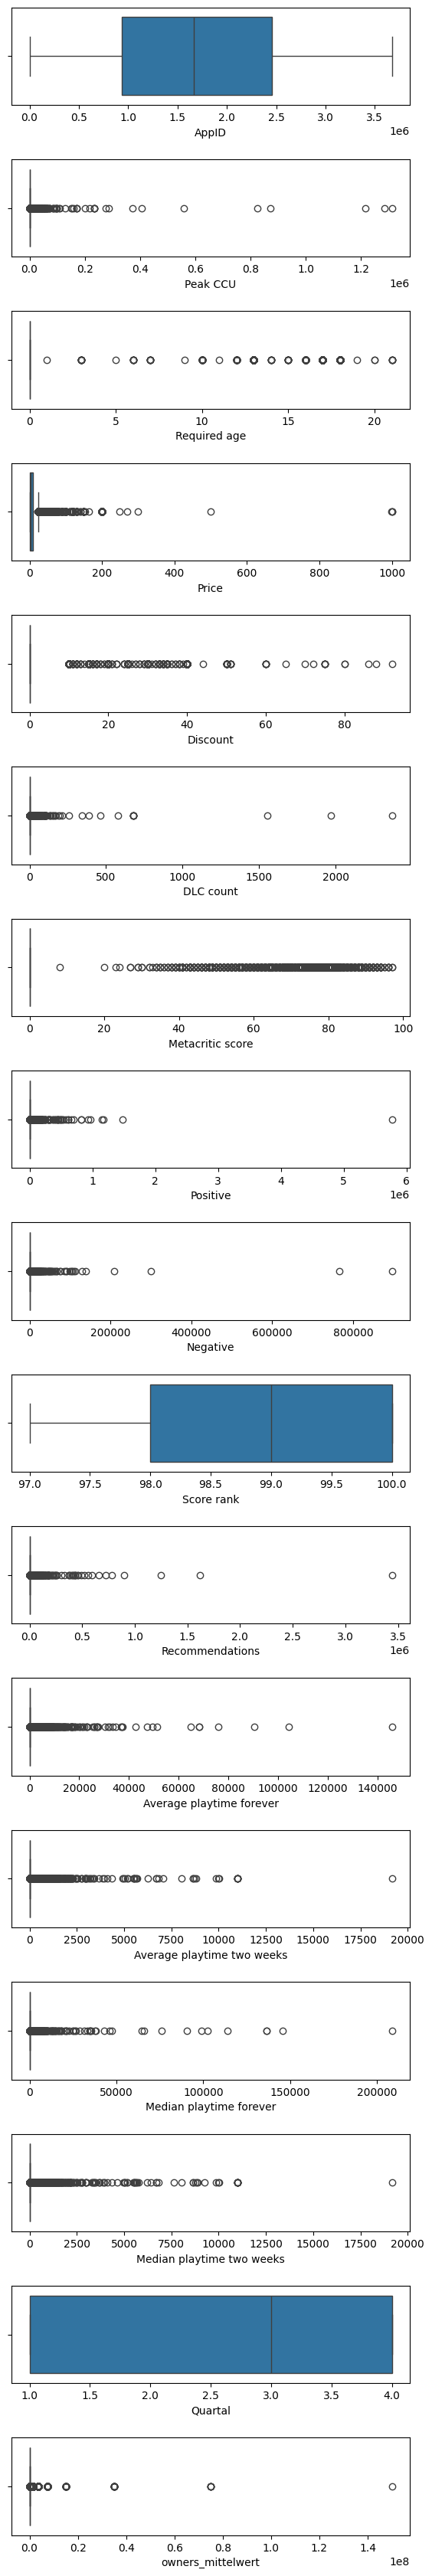

In [ ]:
cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(6, 2 * len(cols)))  # Mehr Höhe für Abstand
for i in range(len(cols)):    
        sns.boxplot(x=cols[i], orient='h', data=df, ax=axes[i])
fig.tight_layout(pad=2.0)
plt.show()  

C:\Users\celin\AppData\Local\Temp\ipykernel_5320\1834163728.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks], fontsize=8)
C:\Users\celin\AppData\Local\Temp\ipykernel_5320\1834163728.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks], fontsize=8)
C:\Users\celin\AppData\Local\Temp\ipykernel_5320\1834163728.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks], fontsize=8)
C:\Users\celin\AppData\Local\Temp\ipykernel_5320\1834163728.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i

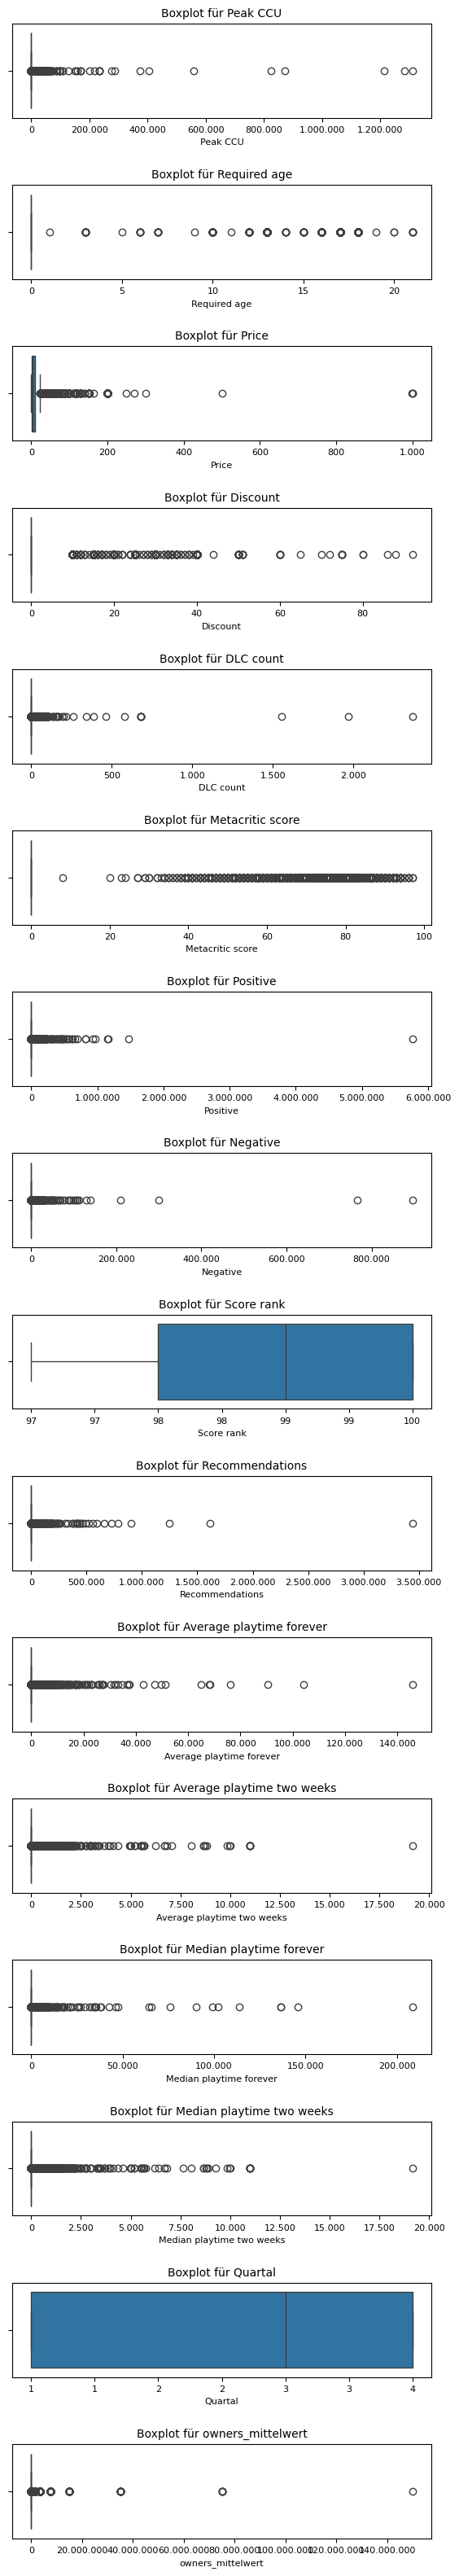

In [ ]:
# Boxplots für alle numerischen Spalten außer AppID, mit ausgeschriebenen Zahlen auf der Skala
cols = df.select_dtypes(include=[np.number]).columns
cols = [col for col in cols if col.lower() != 'appid']  # AppID entfernen

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(6, 2 * len(cols)))  # Kompaktere Darstellung

for i in range(len(cols)):    
    sns.boxplot(x=cols[i], orient='h', data=df, ax=axes[i])
    # Skala: große Zahlen ausgeschrieben anzeigen
    xticks = axes[i].get_xticks()
    axes[i].set_xticklabels([f"{int(x):,}".replace(",", ".") for x in xticks], fontsize=8)
    axes[i].set_title(f'Boxplot für {cols[i]}', fontsize=10)
    axes[i].set_xlabel(cols[i], fontsize=8)

fig.tight_layout(pad=2.0)
plt.show()

Interpretation der Boxplots:

Bei fast allen Spalten gibt es viele Ausreißer nach oben. Das heißt: Die meisten Spiele haben kleine Werte, aber ein paar Spiele haben sehr große Werte.
Die meisten Werte liegen ganz links (niedrig), nur wenige Spiele haben hohe Werte.
Bei Score rank und Quartal sind die Werte gleichmäßiger verteilt, hier gibt es keine Ausreißer.
Bei den Spielzeiten: Die meisten Spiele werden wenig gespielt, nur wenige sehr viel.

Die meisten numerischen Merkmale im Datensatz sind sehr ungleich verteilt: Viele Spiele haben niedrige Werte, wenige Spiele haben extrem hohe Werte (Ausreißer). 
Das deutet darauf hin, dass nur wenige Spiele erfolgreich sind und sich von den anderen Spielen abheben.


Erstellung von Histogrammen für die Analyse der Verteilung der numerischen Werte

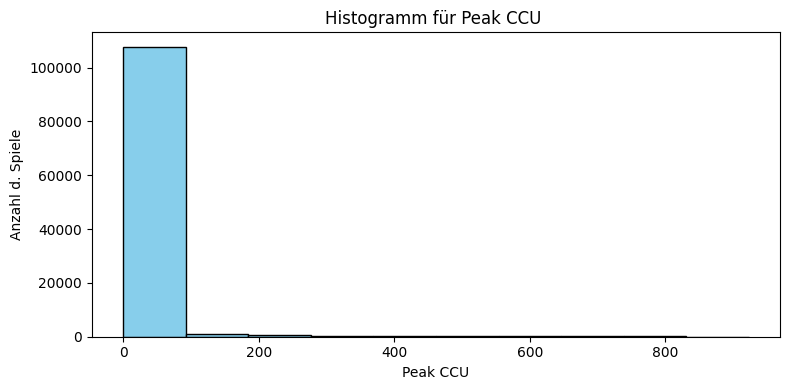

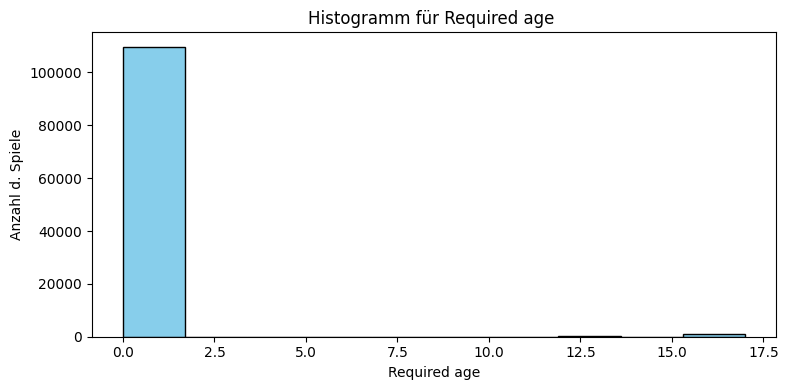

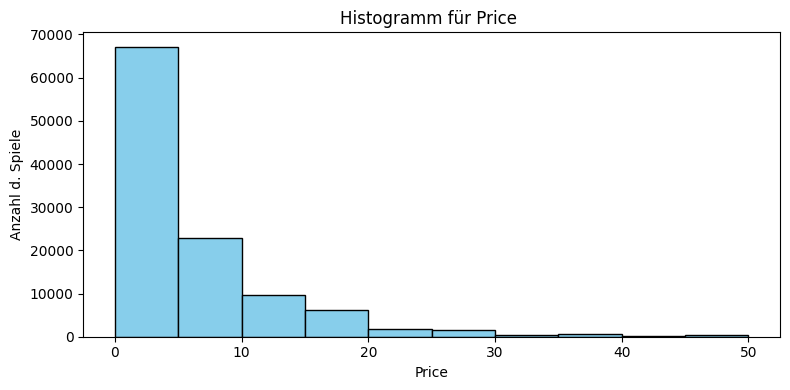

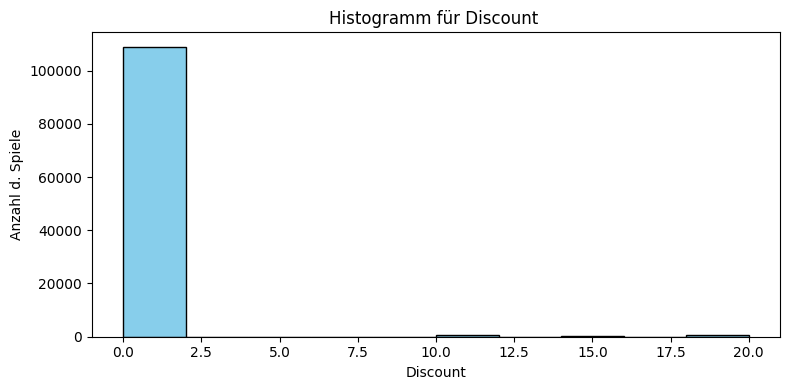

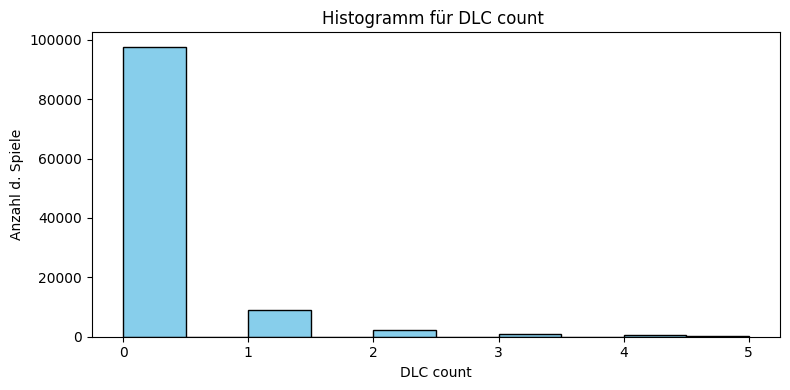

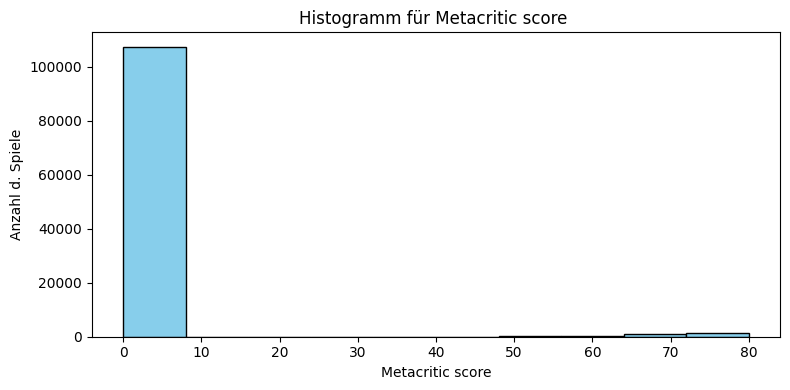

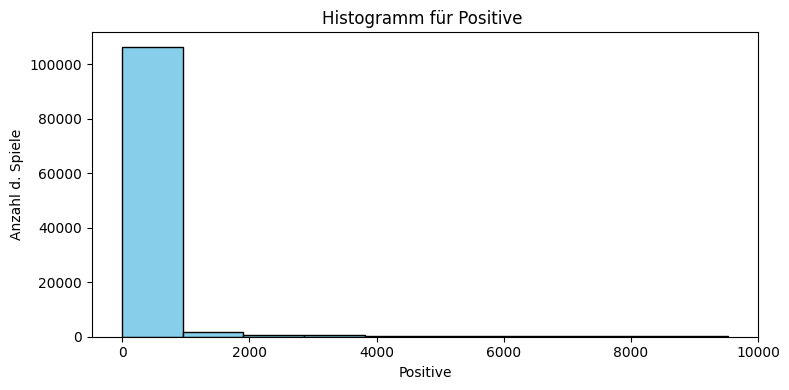

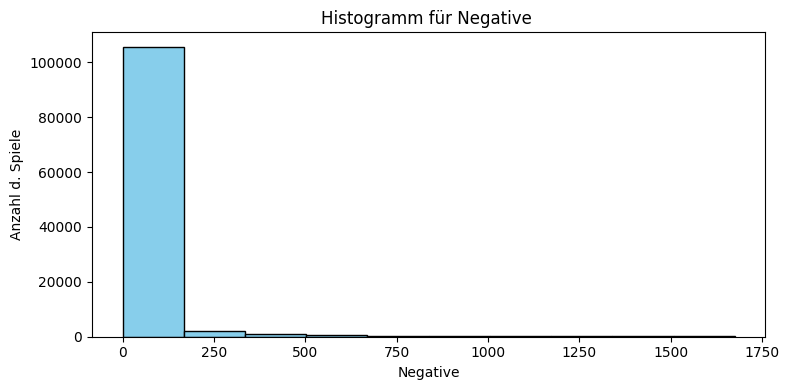

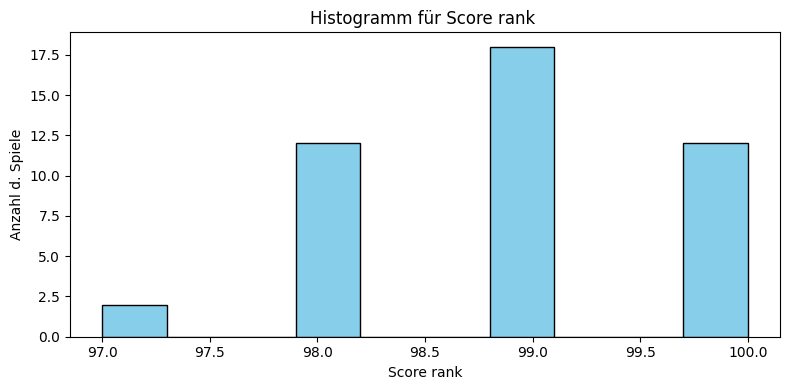

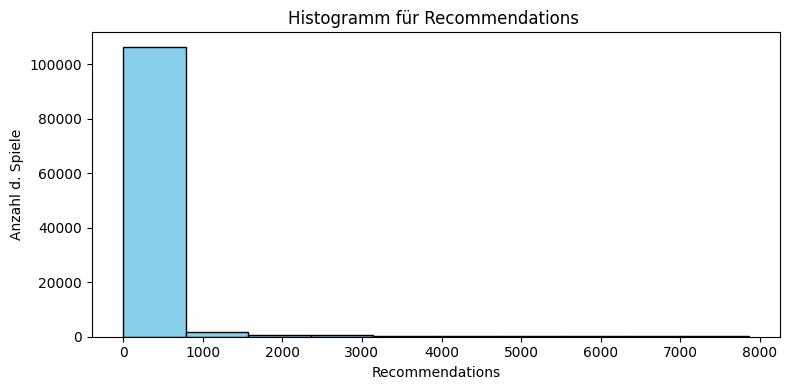

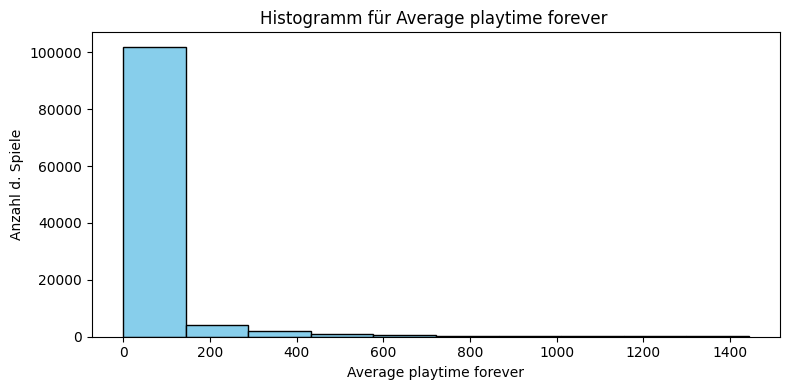

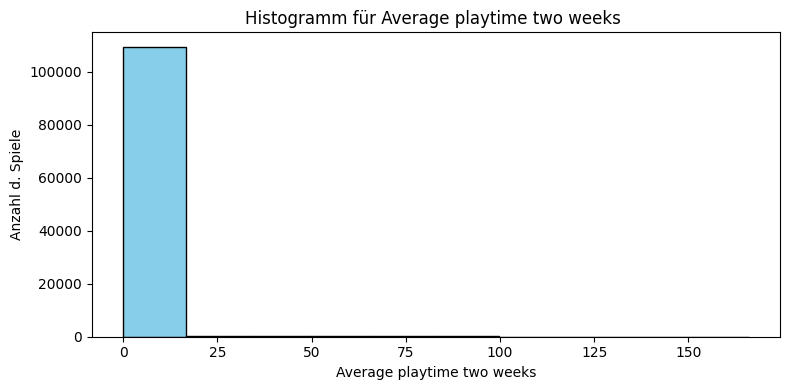

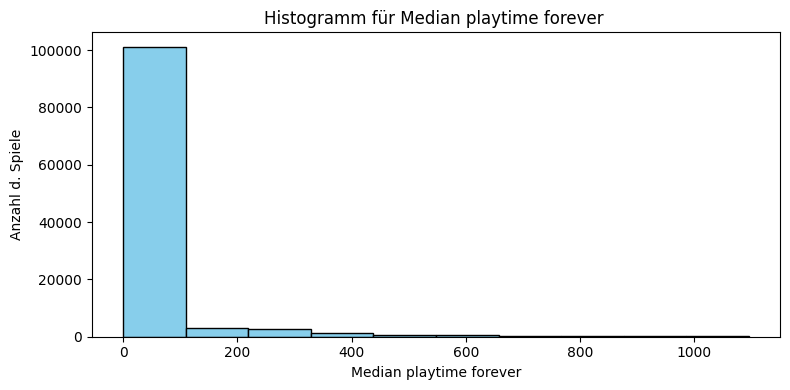

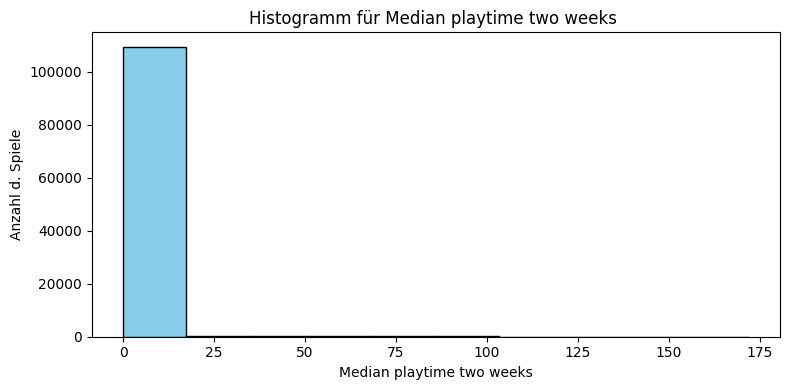

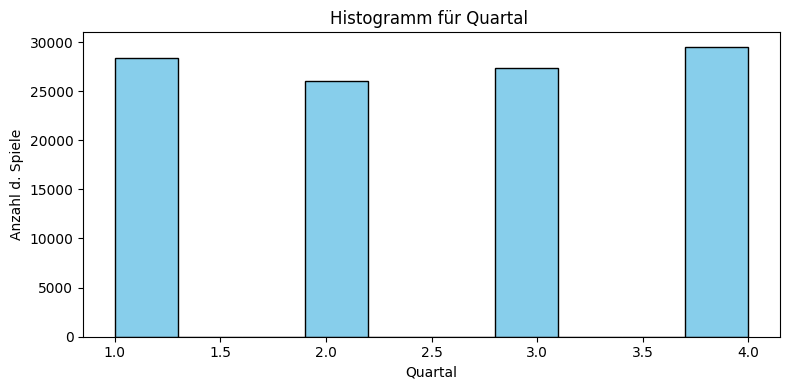

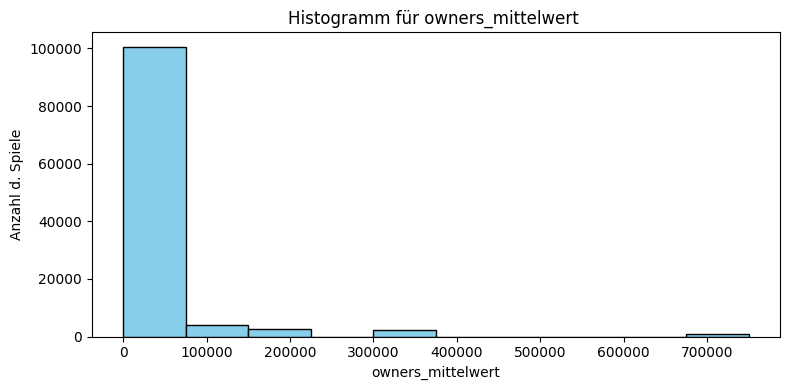

In [ ]:
# Alle numerischen Spalten auswählen (außer AppID, falls nicht relevant)
numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col.lower() != 'appid']

for spalte in numeric_columns:
    werte = df[spalte].dropna()
    # Werte auf das 99. Perzentil begrenzen, um Ausreißer auszublenden
    max_wert = werte.quantile(0.99)
    werte_cut = werte[werte <= max_wert]

    plt.figure(figsize=(8, 4))
    # Wenige Bins für breite Balken, z.B. 10
    plt.hist(werte_cut, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogramm für {spalte} ')
    plt.xlabel(spalte)
    plt.ylabel('Anzahl d. Spiele')
    plt.tight_layout()
    plt.show()

In [ ]:
# Tabelle mit allen Spielen und den gewünschten Spalten anzeigen
vergleichs_spalten = [
    'Name',
    'Positive',
    'Negative',
    'Score rank',
    'Recommendations',
    'Average playtime forever',
    'Average playtime two weeks',
    'Median playtime forever',
    'Median playtime two weeks'
]

# Tabelle erstellen
tabelle = df[vergleichs_spalten]
print(tabelle)

                           Name  Positive  Negative  Score rank  \
0              Galactic Bowling         6        11         NaN   
1                  Train Bandit        53         5         NaN   
2                  Jolt Project         0         0         NaN   
3                      Henosis™         3         0         NaN   
4         Two Weeks in Painland        50         8         NaN   
...                         ...       ...       ...         ...   
111447          Paragon Of Time         5         0         NaN   
111448  A Few Days With : Hazel         0         0         NaN   
111449                 MosGhost        24        12         NaN   
111450               AccuBow VR         0         0         NaN   
111451   Defense Of Fort Burton         0         0         NaN   

        Recommendations  Average playtime forever  Average playtime two weeks  \
0                     0                         0                           0   
1                     0          

Erstellung von Heatmaps für die Untersuchung der Korrelationen 

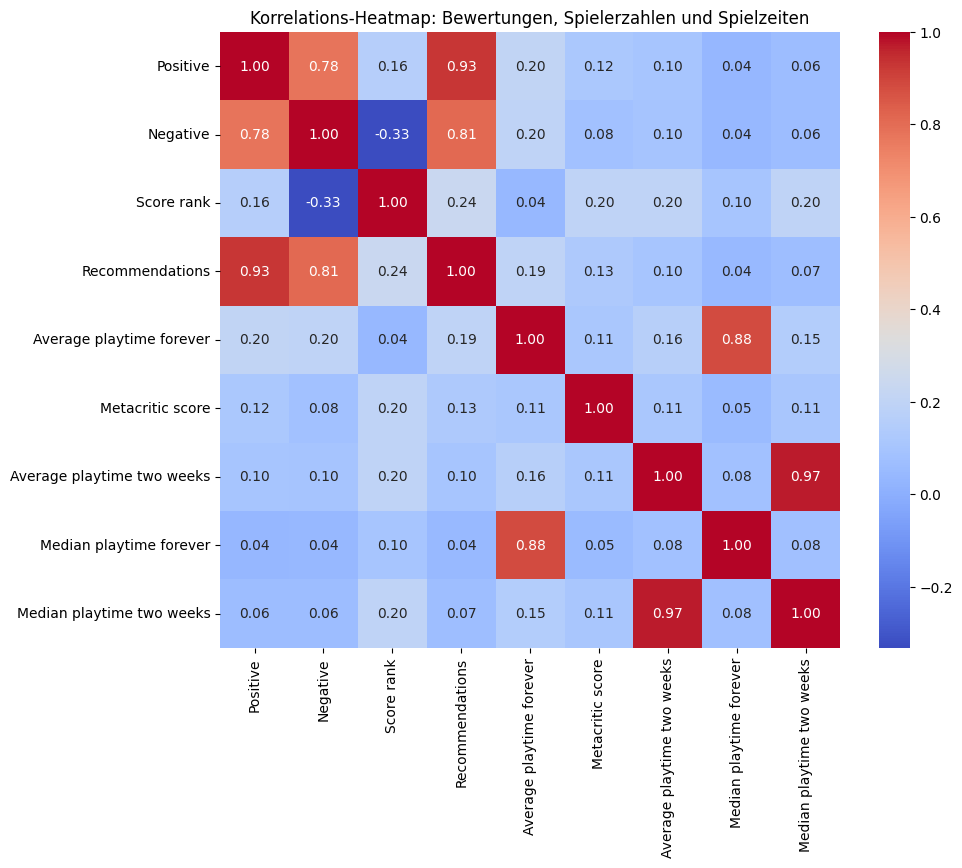

In [ ]:

# Spalten für die Heatmap (ohne 'Name')
columns_of_interest = [
    'Positive',
    'Negative',
    'Score rank',
    'Recommendations',
    'Average playtime forever',
    'Metacritic score',
    'Average playtime two weeks',
    'Median playtime forever',
    'Median playtime two weeks'
]

# Subset erstellen und Korrelation berechnen
subset_df = df[columns_of_interest]
corr = subset_df.corr()

# Heatmap zeichnen
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelations-Heatmap: Bewertungen, Spielerzahlen und Spielzeiten')
plt.show()

Interpretation der Korrelations-Heatmap:
Starke positive Korrelationen bestehen zwischen:

Positive und Recommendations (0.90): Spiele mit vielen positiven Bewertungen werden auch häufig empfohlen.
Positive und Negative (0.78): Spiele mit vielen positiven Bewertungen erhalten meist auch viele negative Bewertungen – vermutlich, weil sie insgesamt mehr Bewertungen bekommen.
Recommendations und Negative (0.79): Auch hier zeigt sich, dass beliebte Spiele generell mehr Bewertungen aller Art erhalten.
Average playtime forever und Median playtime forever (0.88): Die durchschnittliche und die mittlere Gesamtspielzeit sind sehr ähnlich verteilt.
Average playtime two weeks und Median playtime two weeks (0.97): Die durchschnittliche und die mittlere Spielzeit der letzten zwei Wochen stimmen fast überein.

Schwache Korrelationen:
Score rank zeigt nur schwache Zusammenhänge mit den anderen Variablen (maximal 0.24).
Metacritic score korreliert nur sehr schwach mit allen anderen Werten (maximal 0.20).
Keine starken negativen Korrelationen sind in dieser Heatmap zu erkennen.


Die wichtigsten Zusammenhänge bestehen zwischen den Bewertungen (positive, negative, Empfehlungen) und zwischen den Spielzeit-Metriken. Der Score rank und der Metacritic score stehen dagegen kaum im Zusammenhang mit den anderen betrachteten Variablen.



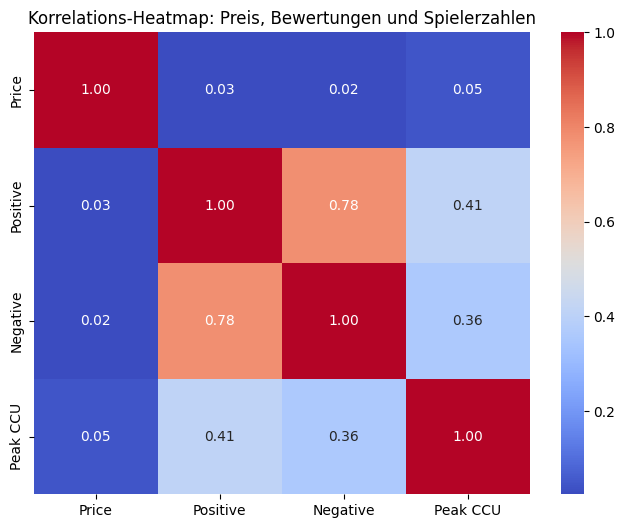

In [ ]:

# Korrelationsanalyse: Heatmap für Preis, Bewertungen und Spielerzahlen
columns_of_interest = ['Price', 'Positive', 'Negative', 'Peak CCU']
subset_df = df[columns_of_interest]
corr = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelations-Heatmap: Preis, Bewertungen und Spielerzahlen')
plt.show()


Es besteht eine starke positive Korrelation zwischen positiven und negativen Bewertungen (0.78). Das bedeutet, dass Spiele mit vielen positiven Bewertungen meist auch viele negative Bewertungen erhalten – vermutlich, weil sie insgesamt häufiger bewertet werden.

Zwischen der Anzahl der positiven Bewertungen und der höchsten gleichzeitigen Spielerzahl (Peak CCU) gibt es einen mittleren positiven Zusammenhang (0.41). Spiele mit vielen positiven Bewertungen werden also tendenziell auch von mehr Spielern gleichzeitig gespielt.

Auch zwischen negativen Bewertungen und Peak CCU besteht ein mittlerer positiver Zusammenhang (0.35).
Der Preis eines Spiels steht kaum im Zusammenhang mit Bewertungen oder Spielerzahlen (alle Korrelationen mit Price liegen nahe 0


----------------------------------------------------------------------

Auflistung der Top 10 Spiele anhand unserer Erfolgsfaktoren. 

("Unter „Erfolg“ verstehen wir dabei ein Zusammenspiel aus Verkaufszahlen, aktiver Spieleranzahl, Bewertungen sowie der durchschnittlichen Spielzeit.")

In [ ]:
# Erfolgsfaktor berechnen: Kombination aus Besitzerzahl, Peak CCU, positiven Bewertungen und durchschnittlicher Spielzeit
df['Erfolgsfaktor'] = (
    df['owners_mittelwert'].fillna(0) +
    df['Peak CCU'].fillna(0) +
    df['Positive'].fillna(0) +
    df['Average playtime forever'].fillna(0)
)

# Top 10 erfolgreiche Spiele nach Erfolgsfaktor
top10 = df.sort_values(by='Erfolgsfaktor', ascending=False).head(10)
print(top10[['Name', 'owners_mittelwert', 'Peak CCU', 'Positive', 'Average playtime forever', 'Erfolgsfaktor']])

                                   Name  owners_mittelwert  Peak CCU  \
17585                            Dota 2        150000000.0    558759   
46158  Counter-Strike: Global Offensive         75000000.0    825215   
96948                Black Myth: Wukong         75000000.0   1214621   
8885                PUBG: BATTLEGROUNDS         75000000.0    275374   
30583                   Team Fortress 2         75000000.0    107702   
7030                          New World         75000000.0     16688   
57205                Grand Theft Auto V         35000000.0    170527   
46416                          Terraria         35000000.0     39165   
8256    Tom Clancy's Rainbow Six® Siege         35000000.0     42263   
1289                        Garry's Mod         35000000.0     37574   

       Positive  Average playtime forever  Erfolgsfaktor  
17585   1477153                     37162    152073074.0  
46158   5764420                     30484     81620119.0  
96948    663109               